In [1]:
import pandas as pd

# Load the datasets
bower_data = pd.read_csv('BowerCA.csv')
sub_data = pd.read_csv('customer_subdata.csv')

# Ensure the email columns are in lowercase for uniform matching
bower_data['customer_email'] = bower_data['customer_email'].str.lower()
sub_data['email'] = sub_data['email'].str.lower()

# Create a dictionary of email to BowerCA customer_id mapping
email_to_id = bower_data.set_index('customer_email')['customer_id'].to_dict()

# Replace the customer_id in the sub_data with BowerCA customer_id if emails match
sub_data['customer_id'] = sub_data['email'].map(email_to_id)

# Merge again using the updated customer_id for a more precise merge
merged_data = pd.merge(
    bower_data, 
    sub_data[['customer_id', 'created_at', 'cancelled_at']], 
    on='customer_id', 
    how='left'
)

# Save the merged data
merged_data.to_csv('BowerCA_with_SubData.csv', index=False)

# Display the first few rows to verify the merge
merged_data.head(5)

/var/folders/fy/xzkbv6m94mnbyhk_sp_6mpmw0000gn/T/ipykernel_14938/4227369071.py:4: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  bower_data = pd.read_csv('BowerCA.csv')
/var/folders/fy/xzkbv6m94mnbyhk_sp_6mpmw0000gn/T/ipykernel_14938/4227369071.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  sub_data = pd.read_csv('customer_subdata.csv')


,customer_id,customer_email,first_name,last_name,customer_created_at,orders_count,billing_address_address_1,billing_address_city,billing_address_country,billing_address_country_code,...,title,order_processed_at,order_line_price,order_volume,total_spent,average_order_value,order_frequency,product_title,created_at,cancelled_at
0,5.546927e+12,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21 UTC,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,Default Title,2022-10-23 10:55:41+00:00,2.990000,4.0,11.96,2.990000,4.0,Bower Rinse Aid - 500ml,NaN,NaN
1,5.546927e+12,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21 UTC,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,Default Title,2022-10-23 10:55:41+00:00,4.245556,27.0,113.93,4.219630,9.0,Bower Fabric Conditioner - Lavender 1L,NaN,NaN
2,5.546927e+12,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21 UTC,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,Default Title,2022-10-23 10:55:41+00:00,4.490000,2.0,8.98,4.490000,2.0,Bower Collective Pot Brush 7cm Fibre,NaN,NaN
3,5.546927e+12,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21 UTC,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,Default Title,2022-10-23 10:55:41+00:00,5.114000,21.0,106.65,5.078571,10.0,Bower Toilet Cleaner - Pine & Cedarwood 1L,NaN,NaN
4,5.546927e+12,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21 UTC,14,11 Ilex Close,High Wycombe,United Kingdom,GB,...,Default Title,2022-12-13 07:15:00+00:00,2.990000,4.0,11.96,2.990000,4.0,Bower Rinse Aid - 500ml,NaN,NaN


In [2]:
# Load the merged dataset
merged_data = pd.read_csv('BowerCA_with_SubData.csv')

# Convert relevant date columns to datetime format
date_columns = ['order_processed_at', 'customer_created_at', 'created_at', 'cancelled_at']
for column in date_columns:
    merged_data[column] = pd.to_datetime(merged_data[column], errors='coerce', utc=True)

# Remove timezone information for easier RFM analysis
for column in date_columns:
    merged_data[column] = merged_data[column].dt.tz_localize(None)

# Save the cleaned dataset
merged_data.to_csv('BowerCA_with_C leanedDates.csv', index=False)

# Display a few rows to verify
merged_data.head()

/var/folders/fy/xzkbv6m94mnbyhk_sp_6mpmw0000gn/T/ipykernel_14938/3029117662.py:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.read_csv('BowerCA_with_SubData.csv')


,customer_id,customer_email,first_name,last_name,customer_created_at,orders_count,billing_address_address_1,billing_address_city,billing_address_country,billing_address_country_code,...,title,order_processed_at,order_line_price,order_volume,total_spent,average_order_value,order_frequency,product_title,created_at,cancelled_at
0,5.546927e+12,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,Default Title,2022-10-23 10:55:41,2.990000,4.0,11.96,2.990000,4.0,Bower Rinse Aid - 500ml,NaT,NaT
1,5.546927e+12,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,Default Title,2022-10-23 10:55:41,4.245556,27.0,113.93,4.219630,9.0,Bower Fabric Conditioner - Lavender 1L,NaT,NaT
2,5.546927e+12,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,Default Title,2022-10-23 10:55:41,4.490000,2.0,8.98,4.490000,2.0,Bower Collective Pot Brush 7cm Fibre,NaT,NaT
3,5.546927e+12,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,Default Title,2022-10-23 10:55:41,5.114000,21.0,106.65,5.078571,10.0,Bower Toilet Cleaner - Pine & Cedarwood 1L,NaT,NaT
4,5.546927e+12,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,11 Ilex Close,High Wycombe,United Kingdom,GB,...,Default Title,2022-12-13 07:15:00,2.990000,4.0,11.96,2.990000,4.0,Bower Rinse Aid - 500ml,NaT,NaT


In [3]:
# Add a new column for subscription status
def subscription_status(row):
    if pd.isna(row['created_at']):
        return 'Never Subscribed'
    elif pd.notna(row['created_at']) and pd.isna(row['cancelled_at']):
        return 'Subscribed'
    elif pd.notna(row['created_at']) and pd.notna(row['cancelled_at']):
        return 'Cancelled'
    else:
        return 'Unknown'

merged_data['subscription_status'] = merged_data.apply(subscription_status, axis=1)

# Display the first few rows to verify
merged_data[['customer_id', 'created_at', 'cancelled_at', 'subscription_status']].head()

# Save the updated dataset
merged_data.to_csv('BowerCA_with_SubscriptionStatus.csv', index=False)

In [4]:
# Load the datasets
sub_mastersheet = pd.read_csv('sub_mastersheet.csv')
customer_subdata = pd.read_csv('customer_subdata.csv')

# Ensure relevant columns are present
print("Sub Mastersheet Columns:", sub_mastersheet.columns)
print("Customer Subdata Columns:", customer_subdata.columns)

# Merge the datasets on the 'id' column
merged_data = pd.merge(customer_subdata, sub_mastersheet[['id', 'product_title', 'sku']], left_on='id', right_on='id', how='left')

# Select only the required columns for clarity
merged_data = merged_data[['id', 'email', 'created_at', 'cancelled_at', 'product_title', 'sku']]

# Display the first few rows of the merged dataset
merged_data.head()

# Save the updated dataset to a new CSV file
merged_data.to_csv('customer_subdata_with_products.csv', index=False)

/var/folders/fy/xzkbv6m94mnbyhk_sp_6mpmw0000gn/T/ipykernel_14938/3843480874.py:2: DtypeWarning: Columns (21,22,24,33,36,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  sub_mastersheet = pd.read_csv('sub_mastersheet.csv')
/var/folders/fy/xzkbv6m94mnbyhk_sp_6mpmw0000gn/T/ipykernel_14938/3843480874.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_subdata = pd.read_csv('customer_subdata.csv')


Sub Mastersheet Columns: Index(['id', '_fivetran_deleted', '_fivetran_synced', 'address_id',
       'cancellation_reason', 'cancellation_reason_comments', 'cancelled_at',
       'charge_interval_frequency', 'created_at', 'customer_id',
       'expire_after_specific_number_of_charges', 'next_charge_scheduled_at',
       'number_charges_until_expiration', 'order_day_of_month',
       'order_day_of_week', 'order_interval_frequency', 'order_interval_unit',
       'price', 'product_title', 'property_attribution',
       'property_charge_interval_frequency',
       'property_charge_interval_unit_type', 'property_group',
       'property_shipping_interval_frequency',
       'property_shipping_interval_unit_type', 'property_source', 'quantity',
       'shopify_product_id', 'shopify_variant_id', 'sku', 'status',
       'updated_at', 'variant_title', 'property_ftmx', 'property_widget_id',
       'property_original_variant_id', 'property_original_url',
       'property_original_product_id', 'prop

In [5]:
merged_data.head(400)

,id,email,created_at,cancelled_at,product_title,sku
0,311252499,NaN,2022-12-19 11:16:49 UTC,2022-12-19 11:17:26 UTC,Bower Bamboo Toilet Tissue - 24 rolls Auto renew,NaN
1,256409741,NaN,2022-06-26 06:33:23 UTC,2022-06-26 06:35:02 UTC,Wild Natural Deodorant Cotton & Sea Salt Refil...,NaN
2,265562923,NaN,2022-07-25 10:29:47 UTC,2023-03-20 14:17:27 UTC,Beauty Kitchen The Sustainables Intense Moistu...,NaN
3,433458991,NaN,2023-12-08 09:49:35 UTC,2023-12-08 16:34:34 UTC,Bower Limescale Remover Refill - 1L,NaN
4,371480630,NaN,2023-06-01 11:21:32 UTC,2023-11-09 14:12:18 UTC,Bower Bamboo Toilet Tissue - 9 rolls,NaN
...,...,...,...,...,...,...
395,447056334,bn@grly.me,2024-01-24 16:08:09 UTC,2024-01-24 16:10:43 UTC,Eco Dishwasher Tablets Trial Pack - Box of 8,BC-DW-TB-TR
396,479734427,bn@grly.me,2024-05-01 14:56:52 UTC,2024-05-01 14:59:26 UTC,Bower Body Wash Refill - Orange & Mandarin 500ml,NaN
397,480074613,bn@grly.me,2024-05-02 13:48:44 UTC,2024-05-07 11:25:10 UTC,Bower Natural Hand Wash Refill - Lime & Aloe V...,NaN
398,227033182,bn@grly.me,2022-03-16 17:42:07 UTC,2022-03-16 17:44:28 UTC,"Bower Hand Sanitiser Gel, Grapefruit and Lemon...",NaN


In [6]:
# Load datasets
bower_data = pd.read_csv('BowerCA_with_SubscriptionStatus.csv')
sub_data = pd.read_csv('customer_subdata_with_products.csv')

# Convert date columns to datetime format
bower_data['created_at'] = pd.to_datetime(bower_data['created_at'], errors='coerce')
bower_data['cancelled_at'] = pd.to_datetime(bower_data['cancelled_at'], errors='coerce')
sub_data['created_at'] = pd.to_datetime(sub_data['created_at'], errors='coerce')
sub_data['cancelled_at'] = pd.to_datetime(sub_data['cancelled_at'], errors='coerce')

# Use only necessary columns for matching
sub_data = sub_data[['email', 'product_title', 'sku', 'created_at', 'cancelled_at']]

# Merge datasets based on email, product title, and SKU
merged_data = bower_data.merge(
    sub_data,
    left_on=['customer_email', 'product_title', 'sku'],
    right_on=['email', 'product_title', 'sku'],
    how='left'
)

# Drop unnecessary columns from the merge
merged_data.drop(columns=['email'], inplace=True)

# Efficiently determine subscription status
def get_subscription_status(row):
    if pd.isna(row['created_at_y']) and pd.isna(row['cancelled_at_y']):
        return 'Direct Purchase'
    elif pd.notna(row['created_at_y']) and pd.isna(row['cancelled_at_y']):
        return 'Subscribed'
    elif pd.notna(row['created_at_y']) and pd.notna(row['cancelled_at_y']):
        return 'Cancelled Subscription'
    else:
        return 'Unknown'

# Apply the function to each row
merged_data['subscription_status'] = merged_data.apply(get_subscription_status, axis=1)

# Drop unnecessary date columns
merged_data.drop(columns=['created_at_y', 'cancelled_at_y'], inplace=True)

# Save the updated DataFrame to a new CSV file
merged_data.to_csv('Updated_BowerCA_with_SubscriptionStatus.csv', index=False)

merged_data.head()

/var/folders/fy/xzkbv6m94mnbyhk_sp_6mpmw0000gn/T/ipykernel_14938/3266695760.py:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  bower_data = pd.read_csv('BowerCA_with_SubscriptionStatus.csv')
/var/folders/fy/xzkbv6m94mnbyhk_sp_6mpmw0000gn/T/ipykernel_14938/3266695760.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  sub_data = pd.read_csv('customer_subdata_with_products.csv')


,customer_id,customer_email,first_name,last_name,customer_created_at,orders_count,billing_address_address_1,billing_address_city,billing_address_country,billing_address_country_code,...,order_processed_at,order_line_price,order_volume,total_spent,average_order_value,order_frequency,product_title,created_at_x,cancelled_at_x,subscription_status
0,5.546927e+12,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,2022-10-23 10:55:41,2.990000,4.0,11.96,2.990000,4.0,Bower Rinse Aid - 500ml,NaT,NaT,Direct Purchase
1,5.546927e+12,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,2022-10-23 10:55:41,4.245556,27.0,113.93,4.219630,9.0,Bower Fabric Conditioner - Lavender 1L,NaT,NaT,Direct Purchase
2,5.546927e+12,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,2022-10-23 10:55:41,4.490000,2.0,8.98,4.490000,2.0,Bower Collective Pot Brush 7cm Fibre,NaT,NaT,Direct Purchase
3,5.546927e+12,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,2022-10-23 10:55:41,5.114000,21.0,106.65,5.078571,10.0,Bower Toilet Cleaner - Pine & Cedarwood 1L,NaT,NaT,Direct Purchase
4,5.546927e+12,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,11 Ilex Close,High Wycombe,United Kingdom,GB,...,2022-12-13 07:15:00,2.990000,4.0,11.96,2.990000,4.0,Bower Rinse Aid - 500ml,NaT,NaT,Direct Purchase


In [7]:
# Filter rows where the subscription status is 'Subscribed'
subscribed_customers = merged_data.loc[merged_data['subscription_status'] == 'Subscribed']

# Display the first few rows of subscribed customers
subscribed_customers.head(400)

,customer_id,customer_email,first_name,last_name,customer_created_at,orders_count,billing_address_address_1,billing_address_city,billing_address_country,billing_address_country_code,...,order_processed_at,order_line_price,order_volume,total_spent,average_order_value,order_frequency,product_title,created_at_x,cancelled_at_x,subscription_status
16824,5.549103e+12,sophiamacmo@yahoo.co.uk,Sophia,Steuart Fothringham,2021-12-30 09:05:08,16,Achnacone House,Argyll,United Kingdom,GB,...,2024-06-04 10:13:01,3.16,1.0,3.16,3.16,1.0,Bambaw Bamboo Cotton Buds - 200 pieces,2022-05-27 07:33:12,2023-02-25 01:45:00,Subscribed
16825,5.549103e+12,sophiamacmo@yahoo.co.uk,Sophia,Steuart Fothringham,2021-12-30 09:05:08,16,Achnacone House,Argyll,United Kingdom,GB,...,2024-06-04 10:13:01,3.16,1.0,3.16,3.16,1.0,Bambaw Bamboo Cotton Buds - 200 pieces,2022-05-27 07:31:55,2022-09-27 14:08:29,Subscribed
16826,5.549103e+12,sophiamacmo@yahoo.co.uk,Sophia,Steuart Fothringham,2021-12-30 09:05:08,16,Achnacone House,Argyll,United Kingdom,GB,...,2024-06-04 10:13:01,3.16,1.0,3.16,3.16,1.0,Bambaw Bamboo Cotton Buds - 200 pieces,2022-03-28 17:05:37,2022-09-27 14:08:14,Subscribed
16827,5.549103e+12,sophiamacmo@yahoo.co.uk,Sophia,Steuart Fothringham,2021-12-30 09:05:08,16,Achnacone House,Argyll,United Kingdom,GB,...,2024-06-04 10:13:01,3.16,1.0,3.16,3.16,1.0,Bambaw Bamboo Cotton Buds - 200 pieces,2021-12-30 09:05:06,2022-04-28 17:15:26,Subscribed
16828,5.549103e+12,sophiamacmo@yahoo.co.uk,Sophia,Steuart Fothringham,2021-12-30 09:05:08,16,Achnacone House,Argyll,United Kingdom,GB,...,2024-06-04 10:13:01,3.16,1.0,3.16,3.16,1.0,Bambaw Bamboo Cotton Buds - 200 pieces,2022-02-03 08:31:30,2023-01-27 08:43:54,Subscribed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95193,5.568846e+12,karen.brown3665@gmail.com,Karen,Brown,2022-01-09 15:02:34,15,7 Promenade View,Newbiggin-by-the-Sea,United Kingdom,GB,...,2022-04-04 04:39:49,4.35,34.0,147.90,4.35,11.0,Bio-D Concentrated Washing Powder 1KG,2022-08-09 07:52:03,2022-12-02 13:21:25,Subscribed
95194,5.568846e+12,karen.brown3665@gmail.com,Karen,Brown,2022-01-09 15:02:34,15,7 Promenade View,Newbiggin-by-the-Sea,United Kingdom,GB,...,2022-04-04 04:39:49,4.35,34.0,147.90,4.35,11.0,Bio-D Concentrated Washing Powder 1KG,2022-05-01 11:19:30,2022-12-02 13:21:35,Subscribed
95195,5.568846e+12,karen.brown3665@gmail.com,Karen,Brown,2022-01-09 15:02:34,15,7 Promenade View,Newbiggin-by-the-Sea,United Kingdom,GB,...,2022-04-04 04:39:49,4.35,34.0,147.90,4.35,11.0,Bio-D Concentrated Washing Powder 1KG,2023-06-18 16:10:29,NaT,Subscribed
95196,5.568846e+12,karen.brown3665@gmail.com,Karen,Brown,2022-01-09 15:02:34,15,7 Promenade View,Newbiggin-by-the-Sea,United Kingdom,GB,...,2022-04-04 04:39:49,4.35,34.0,147.90,4.35,11.0,Bio-D Concentrated Washing Powder 1KG,2024-02-18 07:49:23,NaT,Subscribed


In [8]:
subscribed_customers.columns

Index(['customer_id', 'customer_email', 'first_name', 'last_name',
       'customer_created_at', 'orders_count', 'billing_address_address_1',
       'billing_address_city', 'billing_address_country',
       'billing_address_country_code', 'billing_address_first_name',
       'billing_address_last_name', 'billing_address_zip',
       'buyer_accepts_marketing', 'product_type', 'sku', 'title',
       'order_processed_at', 'order_line_price', 'order_volume', 'total_spent',
       'average_order_value', 'order_frequency', 'product_title',
       'created_at_x', 'cancelled_at_x', 'subscription_status'],
      dtype='object')

In [9]:
import pandas as pd
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load and preprocess the data
df = pd.read_csv('BowerCA_with_SubscriptionStatus.csv')
df['order_processed_at'] = pd.to_datetime(df['order_processed_at'], errors='coerce')
df = df[df['order_processed_at'] >= '2020-07-01']
analysis_date = datetime.now()

# Calculate RFM metrics
# Calculate Recency (in days)
recency_df = df.groupby('customer_id').agg({
    'order_processed_at': lambda x: (analysis_date - x.max()).days
}).reset_index()
recency_df.columns = ['customer_id', 'Recency']

# Calculate Frequency (count of unique order_processed_at for each customer)
frequency_df = df.groupby('customer_id').agg({
    'order_processed_at': 'nunique'
}).reset_index()
frequency_df.columns = ['customer_id', 'Frequency']

# Create a unique transaction identifier by concatenating SKU and order_processed_at
df['transaction_id'] = df['sku'].astype(str) + '_' + df['order_processed_at'].astype(str)

# Remove duplicates based on 'customer_id' and 'transaction_id'
df_unique = df.drop_duplicates(subset=['customer_id', 'transaction_id'])

# Calculate the total spent per customer by summing 'order_line_price'
monetary_df = df_unique.groupby('customer_id').agg({
    'total_spent': 'sum'
}).reset_index()
monetary_df.columns = ['customer_id', 'Monetary']

# Merge RFM metrics into one DataFrame
rfm_df = recency_df.merge(frequency_df, on='customer_id').merge(monetary_df, on='customer_id')

# Calculate the average interval of purchases for each customer
rfm_df['Avg_Interval'] = df.groupby('customer_id')['order_processed_at'].apply(
    lambda x: (x.max() - x.min()).days / (x.nunique() - 1) if x.nunique() > 1 else (analysis_date - x.max()).days
).reset_index(drop=True)

# Dynamic scoring functions using personalized recency threshold
def dynamic_r_score(row):
    # Use 1.5 times the average interval as a dynamic threshold
    dynamic_threshold = row['Avg_Interval'] * 1.5
    return 5 if row['Recency'] <= dynamic_threshold else (
           4 if row['Recency'] <= dynamic_threshold * 2 else (
           3 if row['Recency'] <= dynamic_threshold * 2.5 else (
           2 if row['Recency'] <= dynamic_threshold * 3 else 1)))

def f_m_score(x):
    return pd.qcut(x.rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Apply dynamic scoring
rfm_df['R_Score'] = rfm_df.apply(dynamic_r_score, axis=1)
rfm_df['F_Score'] = f_m_score(rfm_df['Frequency'])
rfm_df['M_Score'] = f_m_score(rfm_df['Monetary'])

# Create RFM Score
rfm_df['RFM_Score'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Segment customers based on total RFM Score
rfm_df['Segment'] = 'Average'  # Default segment
rfm_df.loc[rfm_df['RFM_Score'] <= 8, 'Segment'] = 'Lapsed'  # Define Lapsed customers based on total RFM score
rfm_df.loc[rfm_df['RFM_Score'] >= 14, 'Segment'] = 'Whales'  # Whales

# Standardize the RFM data for clustering
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Perform K-Means clustering using the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Save the RFM table with clusters to a CSV file
rfm_df.to_csv('BowerCA_RFM_Segments_Clusters.csv', index=False)

# Display the first few rows of the RFM table
print(rfm_df.head(20))

# Display the number of customers in each segment within each cluster
segment_counts = rfm_df.groupby(['Cluster', 'Segment']).size().unstack(fill_value=0)
print(segment_counts)

# Display the total number of customers in each cluster
cluster_totals = rfm_df['Cluster'].value_counts()
print(cluster_totals)


/var/folders/fy/xzkbv6m94mnbyhk_sp_6mpmw0000gn/T/ipykernel_14938/612298839.py:7: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('BowerCA_with_SubscriptionStatus.csv')


     customer_id  Recency  Frequency  Monetary  Avg_Interval  R_Score F_Score  \
0   2.823890e+12      166         21   1012.96     65.750000        4       5   
1   2.823904e+12      124          1     95.21    124.000000        5       1   
2   2.824034e+12     1150          2     33.37    264.000000        2       3   
3   2.824200e+12       82         58  25315.36     25.122807        3       5   
4   2.824312e+12       95         19   1949.78     56.888889        4       5   
5   2.824370e+12      112         49  29208.45     29.229167        2       5   
6   2.824428e+12      554         10   1771.88    102.000000        1       5   
7   2.824445e+12     1057          9    457.12     56.625000        1       5   
8   2.824518e+12      106         63  27907.16     22.903226        1       5   
9   2.825150e+12     1396          2     56.13    114.000000        1       3   
10  2.825194e+12       83         26   3245.83     57.760000        5       5   
11  2.825269e+12      112   

In [10]:
rfm_df.head(400)

,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster
0,2.823890e+12,166,21,1012.96,65.750000,4,5,5,14,Whales,1
1,2.823904e+12,124,1,95.21,124.000000,5,1,4,10,Average,2
2,2.824034e+12,1150,2,33.37,264.000000,2,3,3,8,Lapsed,0
3,2.824200e+12,82,58,25315.36,25.122807,3,5,5,13,Average,1
4,2.824312e+12,95,19,1949.78,56.888889,4,5,5,14,Whales,1
...,...,...,...,...,...,...,...,...,...,...,...
395,2.966461e+12,239,1,109.23,239.000000,5,1,4,10,Average,2
396,2.966938e+12,1484,1,107.94,1484.000000,5,1,4,10,Average,0
397,2.966952e+12,786,3,167.00,148.000000,1,4,4,9,Average,0
398,2.966983e+12,108,43,9116.13,33.833333,3,5,5,13,Average,1


In [11]:
# List of customer IDs to remove
customers_to_remove = [2824517648446, 3010460745790, 5204194656318]

# Filter out the customers from the DataFrame
rfm_df = rfm_df[~rfm_df['customer_id'].isin(customers_to_remove)]


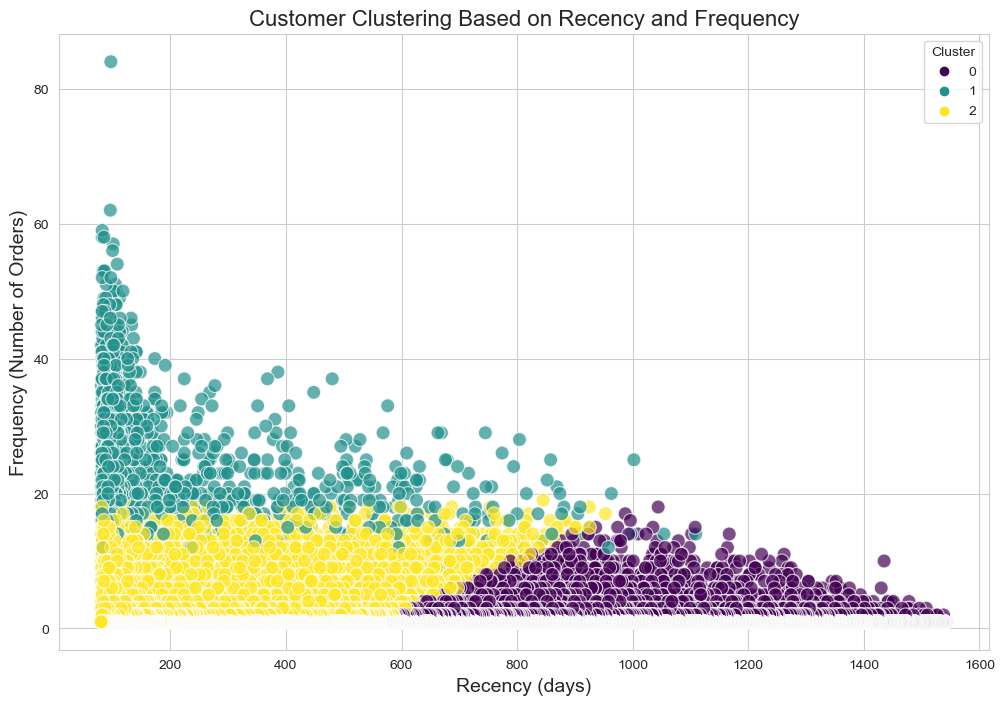

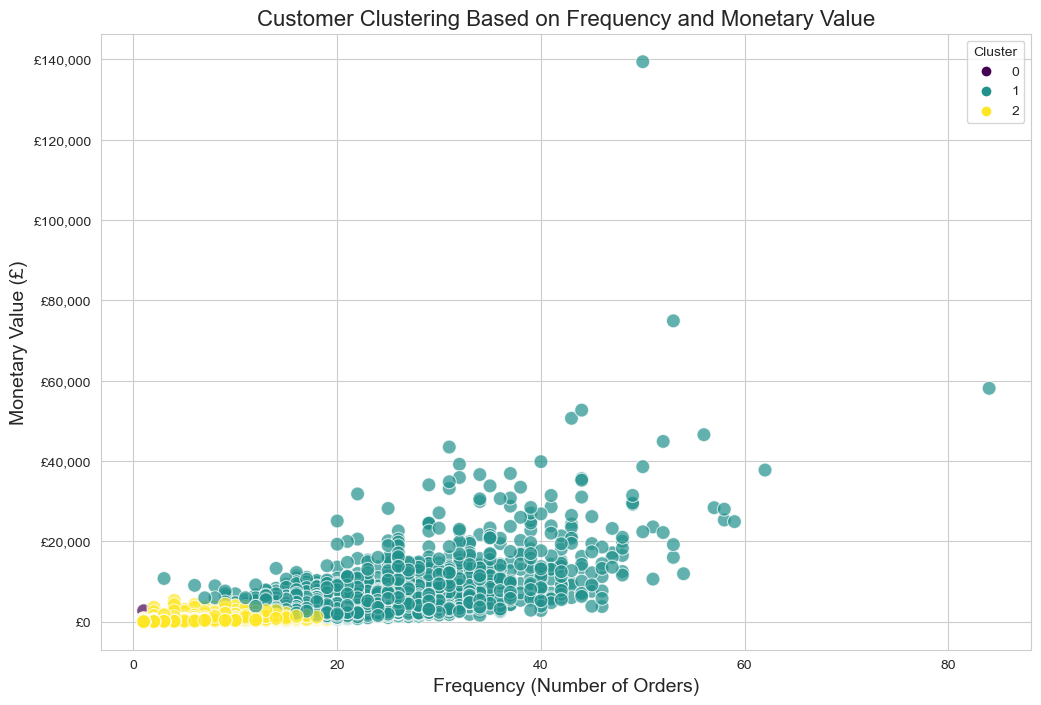

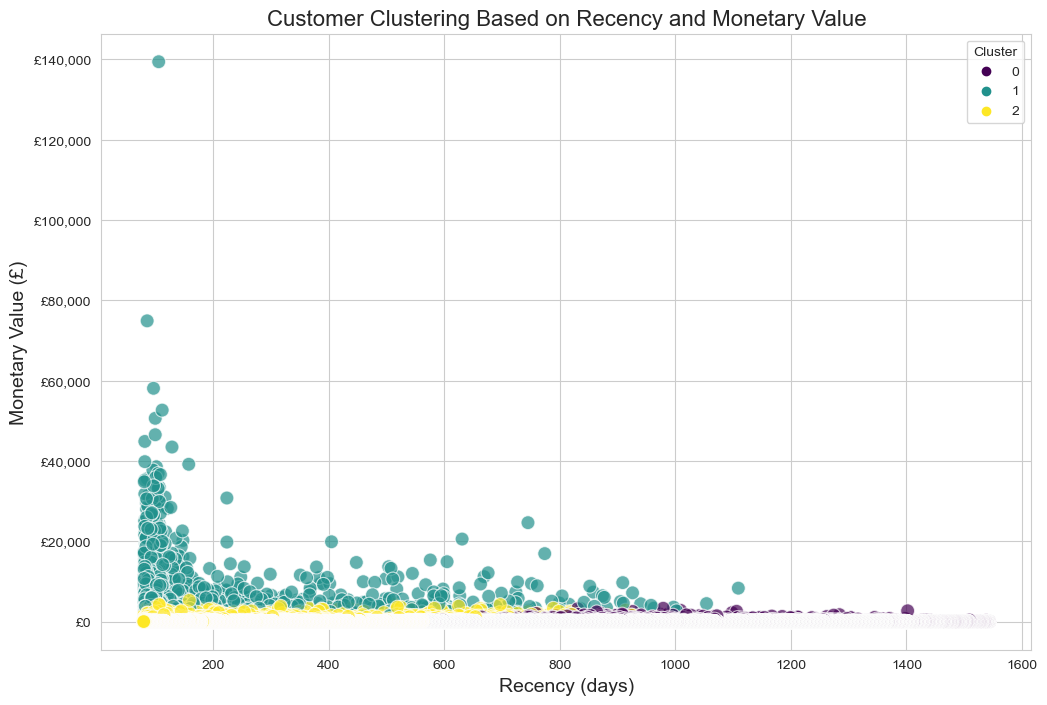

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot Recency vs Frequency with Cluster Colors
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Clustering Based on Recency and Frequency', fontsize=16)
plt.xlabel('Recency (days)', fontsize=14)
plt.ylabel('Frequency (Number of Orders)', fontsize=14)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Plot Frequency vs Monetary Value with Cluster Colors and currency formatting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm_df, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Clustering Based on Frequency and Monetary Value', fontsize=16)
plt.xlabel('Frequency (Number of Orders)', fontsize=14)
plt.ylabel('Monetary Value (£)', fontsize=14)
plt.legend(title='Cluster')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('£{x:,.0f}'))
plt.grid(True)
plt.show()

# Plot Recency vs Monetary Value with Cluster Colors and currency formatting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Clustering Based on Recency and Monetary Value', fontsize=16)
plt.xlabel('Recency (days)', fontsize=14)
plt.ylabel('Monetary Value (£)', fontsize=14)
plt.legend(title='Cluster')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('£{x:,.0f}'))
plt.grid(True)
plt.show()


In [13]:
# Calculate key percentiles
recency_percentiles = rfm_df['Recency'].quantile([0.25, 0.5, 0.75])
print(recency_percentiles)


0.25    210.0
0.50    605.0
0.75    925.0
Name: Recency, dtype: float64


In [14]:
# Summary statistics of the Monetary column
print(rfm_df['Monetary'].describe())

# Identifying potential outliers in the Monetary values
outliers = rfm_df[rfm_df['Monetary'] > rfm_df['Monetary'].quantile(0.99)]
print(outliers)

# Display the top 10 customers with the highest Monetary values
print(rfm_df.nlargest(10, 'Monetary'))


count     76276.000000
mean        353.582067
std        1585.908872
min           0.000000
25%          17.980000
50%          40.880000
75%         129.255000
max      139400.750000
Name: Monetary, dtype: float64
        customer_id  Recency  Frequency  Monetary  Avg_Interval  R_Score  \
3      2.824200e+12       82         58  25315.36     25.122807        3   
5      2.824370e+12      112         49  29208.45     29.229167        2   
14     2.829017e+12      598         22   8141.87     39.666667        1   
15     2.829235e+12      133         45   9321.48     31.409091        2   
18     2.829973e+12       88         43   9715.69     33.404762        4   
...             ...      ...        ...       ...           ...      ...   
61266  6.571611e+12      101         13   6483.33     28.166667        3   
63270  6.639407e+12       93          7   5946.31     49.166667        4   
64044  6.661237e+12       94         11   5974.43     27.200000        3   
68362  6.841002e+12      

In [15]:
# Disable scientific notation
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Display the full customer_id along with recency, frequency, and monetary details for customers in Cluster 1 with Recency 41
recency_41_full = rfm_df[(rfm_df['Recency'] == 41) & (rfm_df['Cluster'] == 1)]
print("Details of customers with Recency 41 in Cluster 1:")
print(recency_41_full[['customer_id', 'Recency', 'Frequency', 'Monetary']])

# Display the full customer_id along with recency, frequency, and monetary details for customers in Cluster 1 with Recency 1005
recency_1005_full = rfm_df[(rfm_df['Recency'] == 1005) & (rfm_df['Cluster'] == 1)]
print("\nDetails of customers with Recency 1005 in Cluster 1:")
print(recency_1005_full[['customer_id', 'Recency', 'Frequency', 'Monetary']])

Details of customers with Recency 41 in Cluster 1:
Empty DataFrame
Columns: [customer_id, Recency, Frequency, Monetary]
Index: []

Details of customers with Recency 1005 in Cluster 1:
Empty DataFrame
Columns: [customer_id, Recency, Frequency, Monetary]
Index: []


In [16]:
rfm_df.head()

,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster
0,2823889911870,166,21,1013,66,4,5,5,14,Whales,1
1,2823904034878,124,1,95,124,5,1,4,10,Average,2
2,2824033763390,1150,2,33,264,2,3,3,8,Lapsed,0
3,2824200290366,82,58,25315,25,3,5,5,13,Average,1
4,2824311537726,95,19,1950,57,4,5,5,14,Whales,1


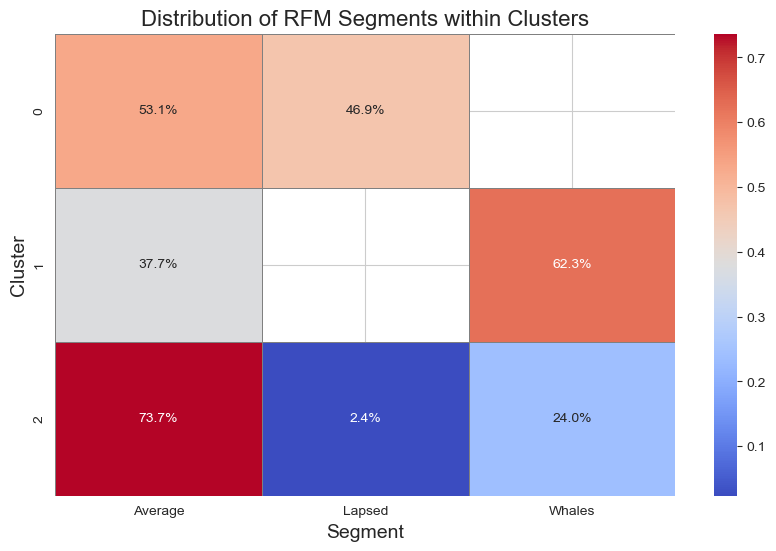

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of segments within each cluster
cluster_segments = rfm_df.groupby('Cluster')['Segment'].value_counts(normalize=True).unstack()

# Plot the distribution of segments within each cluster as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_segments, annot=True, cmap='coolwarm', fmt='.1%', linewidths=0.5, linecolor='gray')
plt.title('Distribution of RFM Segments within Clusters', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Cluster', fontsize=14)
plt.show()


In [18]:
# Count the number of customers in each segment within each cluster
segment_counts = rfm_df.groupby(['Cluster', 'Segment']).size().unstack(fill_value=0)

# Count the total number of customers in each cluster
cluster_totals = rfm_df['Cluster'].value_counts()

# Display the counts
print("Number of customers in each segment within each cluster:")
print(segment_counts)

print("\nTotal number of customers in each cluster:")
print(cluster_totals)


Number of customers in each segment within each cluster:
Segment  Average  Lapsed  Whales
Cluster                         
0          20929   18472       0
1            981       0    1624
2          25243     806    8221

Total number of customers in each cluster:
0    39401
2    34270
1     2605
Name: Cluster, dtype: int64


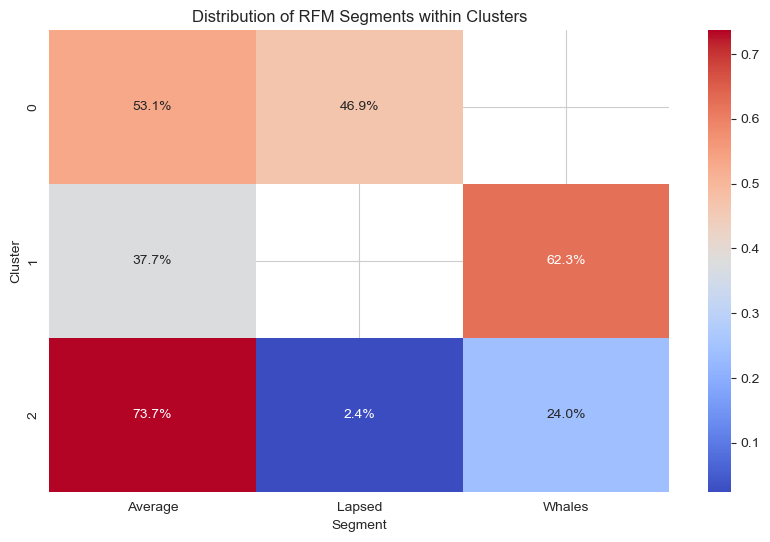

In [19]:
 # Analyze the distribution of segments within clusters
segment_distribution = rfm_df.groupby('Cluster')['Segment'].value_counts(normalize=True).unstack()

# Plot the distribution of segments within each cluster
plt.figure(figsize=(10, 6))
sns.heatmap(segment_distribution, annot=True, cmap='coolwarm', fmt='.1%')
plt.title('Distribution of RFM Segments within Clusters')
plt.xlabel('Segment')
plt.ylabel('Cluster')
plt.show()

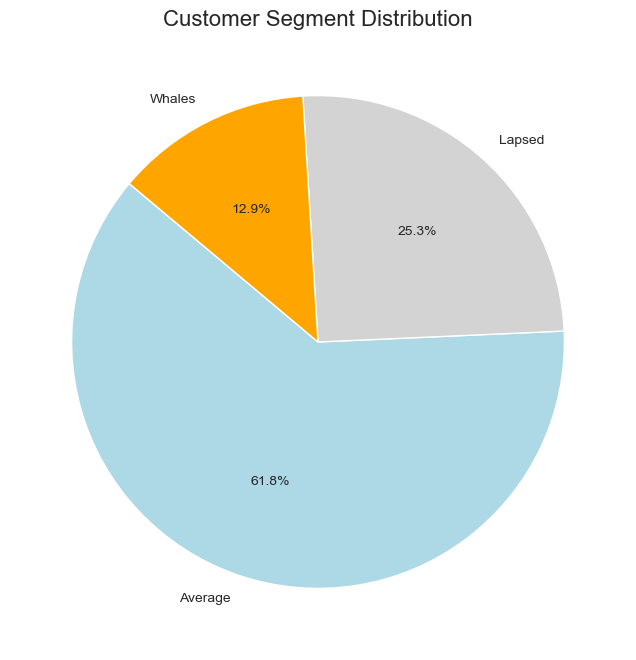

In [20]:

import matplotlib.pyplot as plt

# Calculate the count of each segment
segment_counts = rfm_df['Segment'].value_counts()

# Define the colors for the segments
colors = ['lightblue', 'lightgrey', 'orange']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140, shadow=False)

# Title
plt.title('Customer Segment Distribution', fontsize=16)

# Display the chart
plt.show()


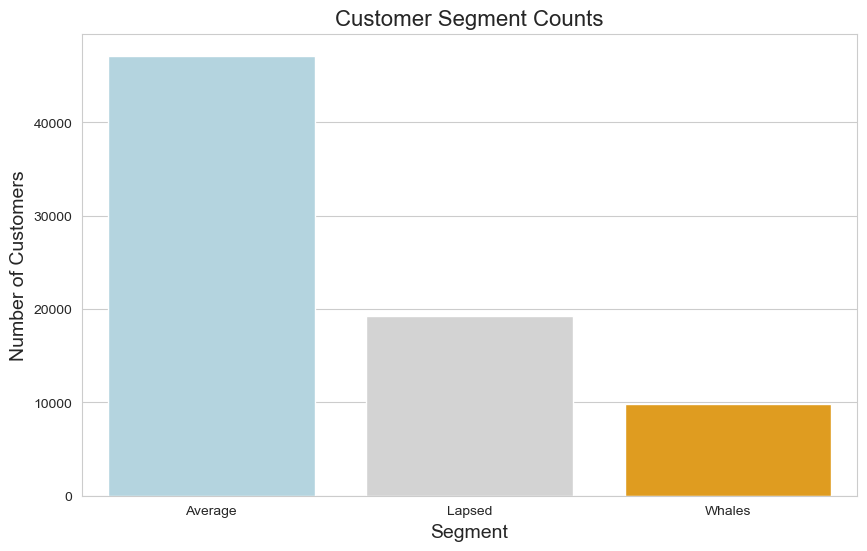

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the counts of each segment
segment_counts = rfm_df['Segment'].value_counts()

palette = {'Whales': 'orange', 'Average': 'lightblue', 'Lapsed': 'lightgrey'}


# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette=palette)

# Add labels and title
plt.title('Customer Segment Counts', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

# Display the bar chart
plt.show()


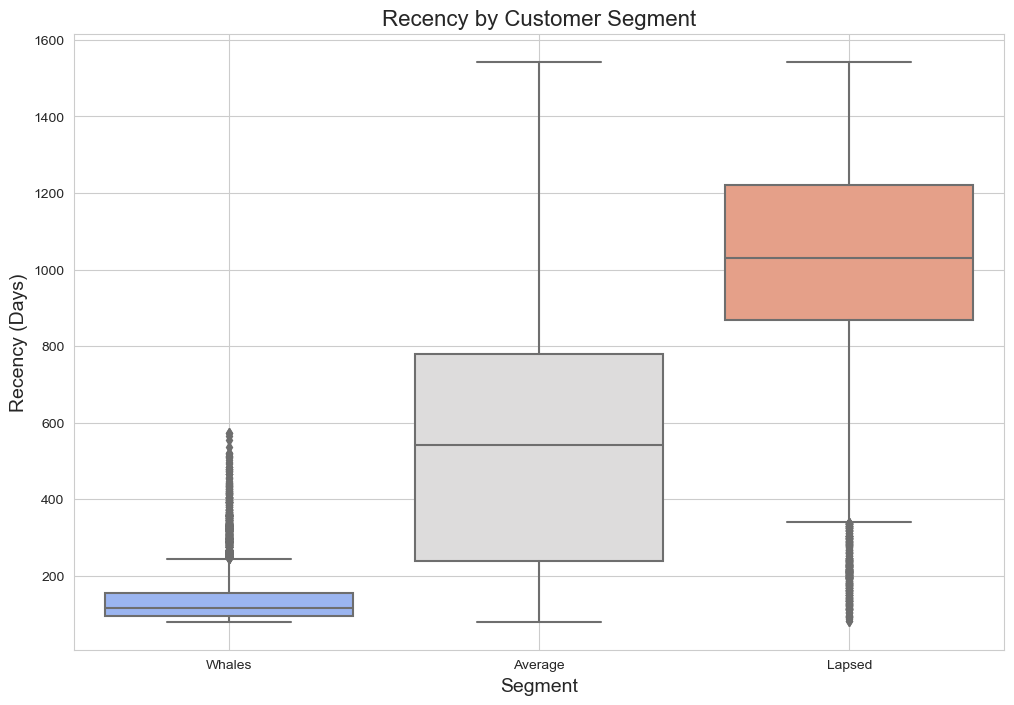

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the Recency plot
plt.figure(figsize=(12, 8))

# Boxplot for Recency by Segment
sns.boxplot(x='Segment', y='Recency', data=rfm_df, palette='coolwarm')
plt.title('Recency by Customer Segment', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Recency (Days)', fontsize=14)
plt.grid(True)

# Display the plot
plt.show()


In [23]:
# Filter customers who are labeled as 'Whales' in Cluster 1
whales_cluster1 = rfm_df[(rfm_df['Cluster'] == 1) & (rfm_df['Segment'] == 'Whales')]

# Display a summary of the RFM scores and values for these customers
print("Summary of RFM Scores for 'Whales' in Cluster 1:")
print(whales_cluster1[['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score']].describe())

# Count the number of customers in Cluster 1 with high RFM scores
high_value_whales_cluster1 = whales_cluster1[(whales_cluster1['R_Score'] == 1) & 
                                             (whales_cluster1['F_Score'] == 3) & 
                                             (whales_cluster1['M_Score'] == 3)]

print(f"Number of high-value 'Whales' in Cluster 1: {len(high_value_whales_cluster1)}")

# Optional: Display the top 10 customers in terms of Monetary value to inspect further
print("Top 10 'Whales' in Cluster 1 based on Monetary Value:")
print(whales_cluster1.sort_values(by='Monetary', ascending=False).head(10))


Summary of RFM Scores for 'Whales' in Cluster 1:
       Recency  Frequency  Monetary  R_Score
count     1624       1624      1624     1624
mean       105         22      5187        4
std         23          7      4557        0
min         81          7       623        4
25%         87         17      2625        4
50%         99         20      3783        4
75%        114         25      5972        4
max        232         53     39845        5
Number of high-value 'Whales' in Cluster 1: 0
Top 10 'Whales' in Cluster 1 based on Monetary Value:
        customer_id  Recency  Frequency  Monetary  Avg_Interval  R_Score  \
10562 5075149848638       82         40     39845            30        4   
16949 5258991337534      101         32     35906            34        4   
61    2894877458494       86         44     35605            34        4   
6775  3705584746558       82         44     35233            29        4   
29583 5646734426174       81         31     34839            29   

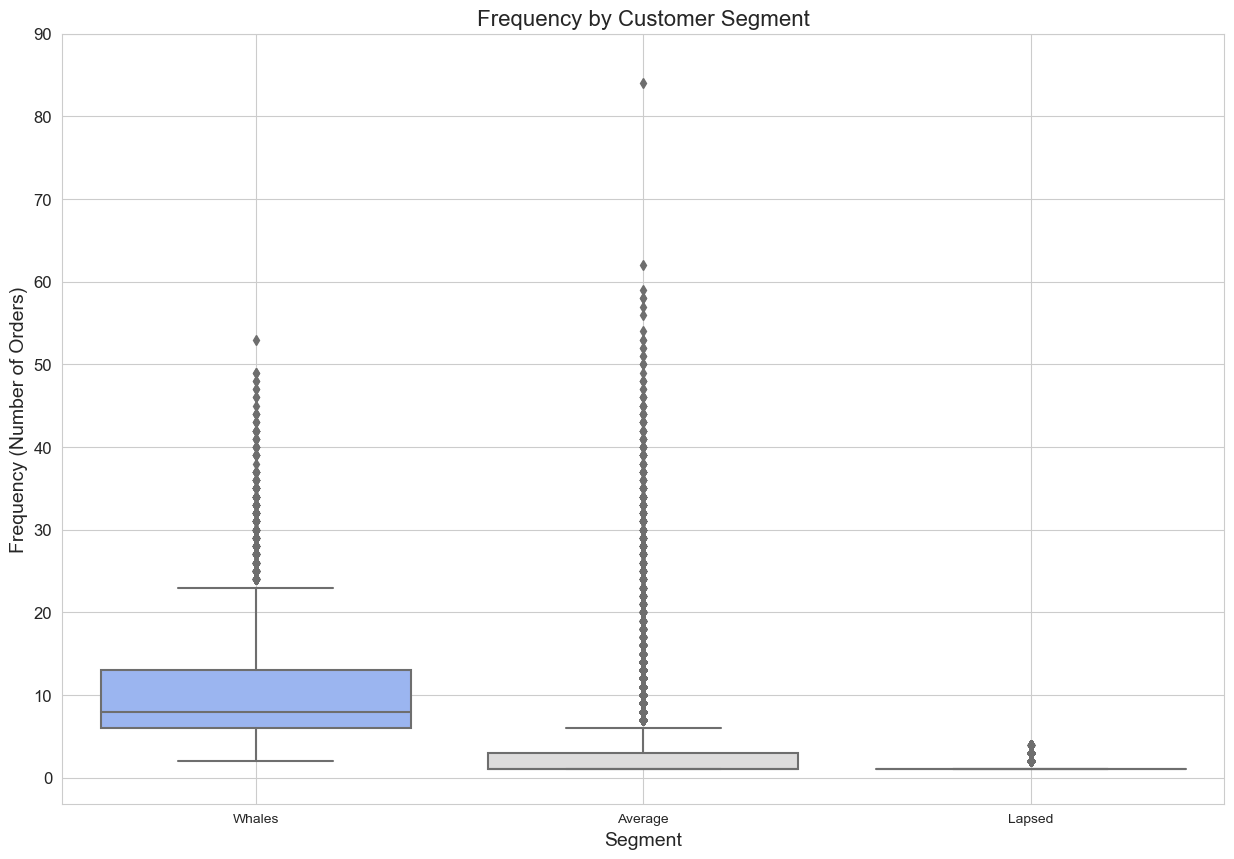

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the Frequency plot
plt.figure(figsize=(15, 10))

# Boxplot for Frequency by Segment
sns.boxplot(x='Segment', y='Frequency', data=rfm_df, palette='coolwarm')
plt.title('Frequency by Customer Segment', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Frequency (Number of Orders)', fontsize=14)
plt.grid(True)

# Set the y-axis tick increments (e.g., every 10 orders)
plt.yticks(ticks=range(0, int(rfm_df['Frequency'].max()) + 10, 10), fontsize=12)

# Display the plot
plt.show()


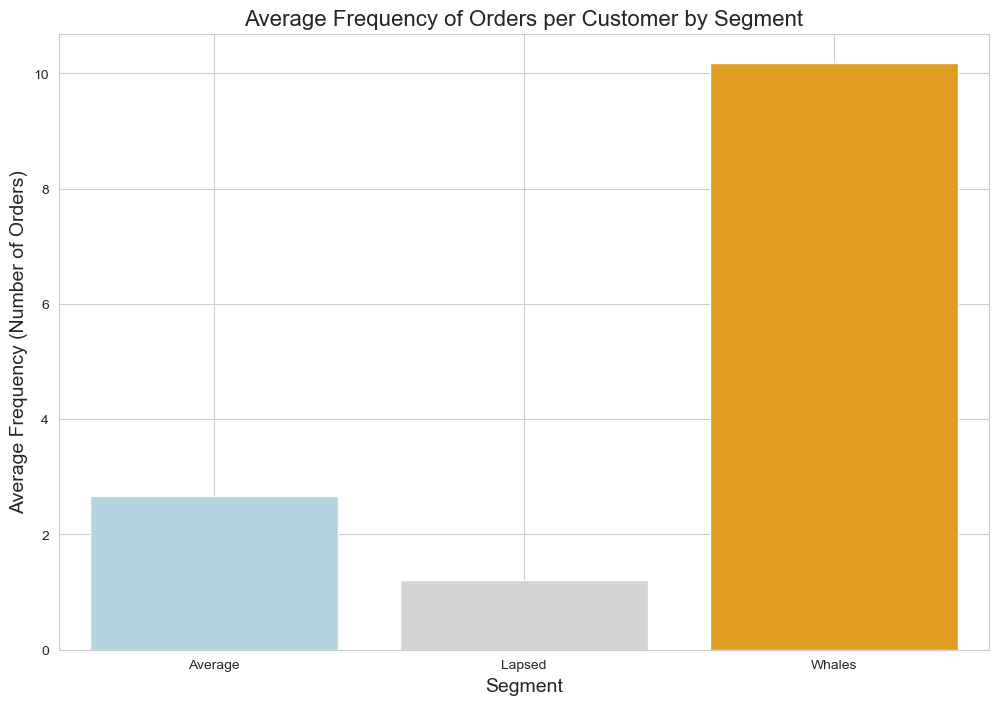

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average frequency by segment
average_frequency = rfm_df.groupby('Segment')['Frequency'].mean().reset_index()

palette = {'Whales': 'orange', 'Average': 'lightblue', 'Lapsed': 'lightgrey'}

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar chart for average Frequency by Customer Segment
sns.barplot(x='Segment', y='Frequency', data=average_frequency, palette=palette)

# Add title and labels
plt.title('Average Frequency of Orders per Customer by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Average Frequency (Number of Orders)', fontsize=14)
plt.grid(True)

# Display the plot
plt.show()


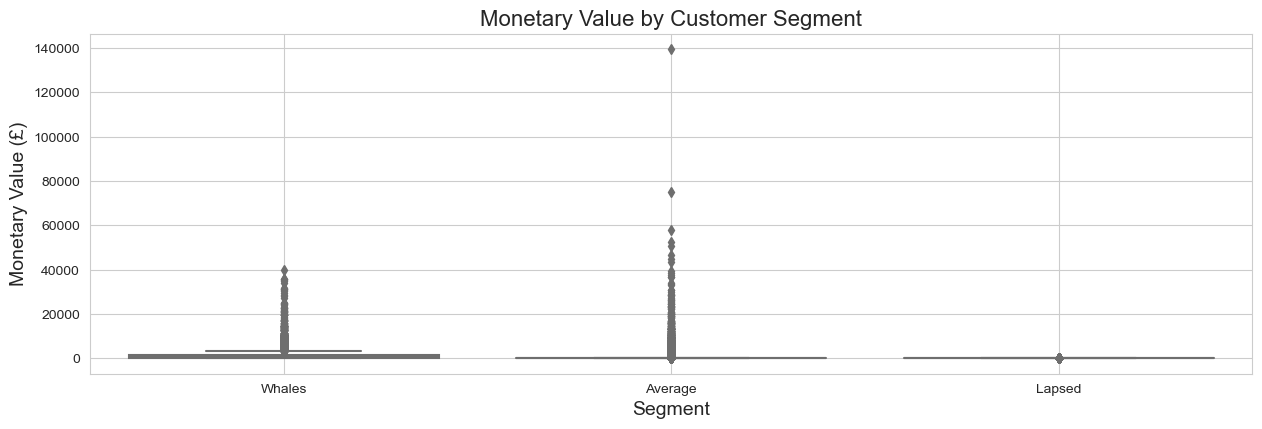

In [26]:
# Boxplot for Monetary by Segment

plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 3)
sns.boxplot(x='Segment', y='Monetary', data=rfm_df, palette='coolwarm')
plt.title('Monetary Value by Customer Segment', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Monetary Value (£)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')  # Ensure no scientific notation on y-axis
plt.grid(True)


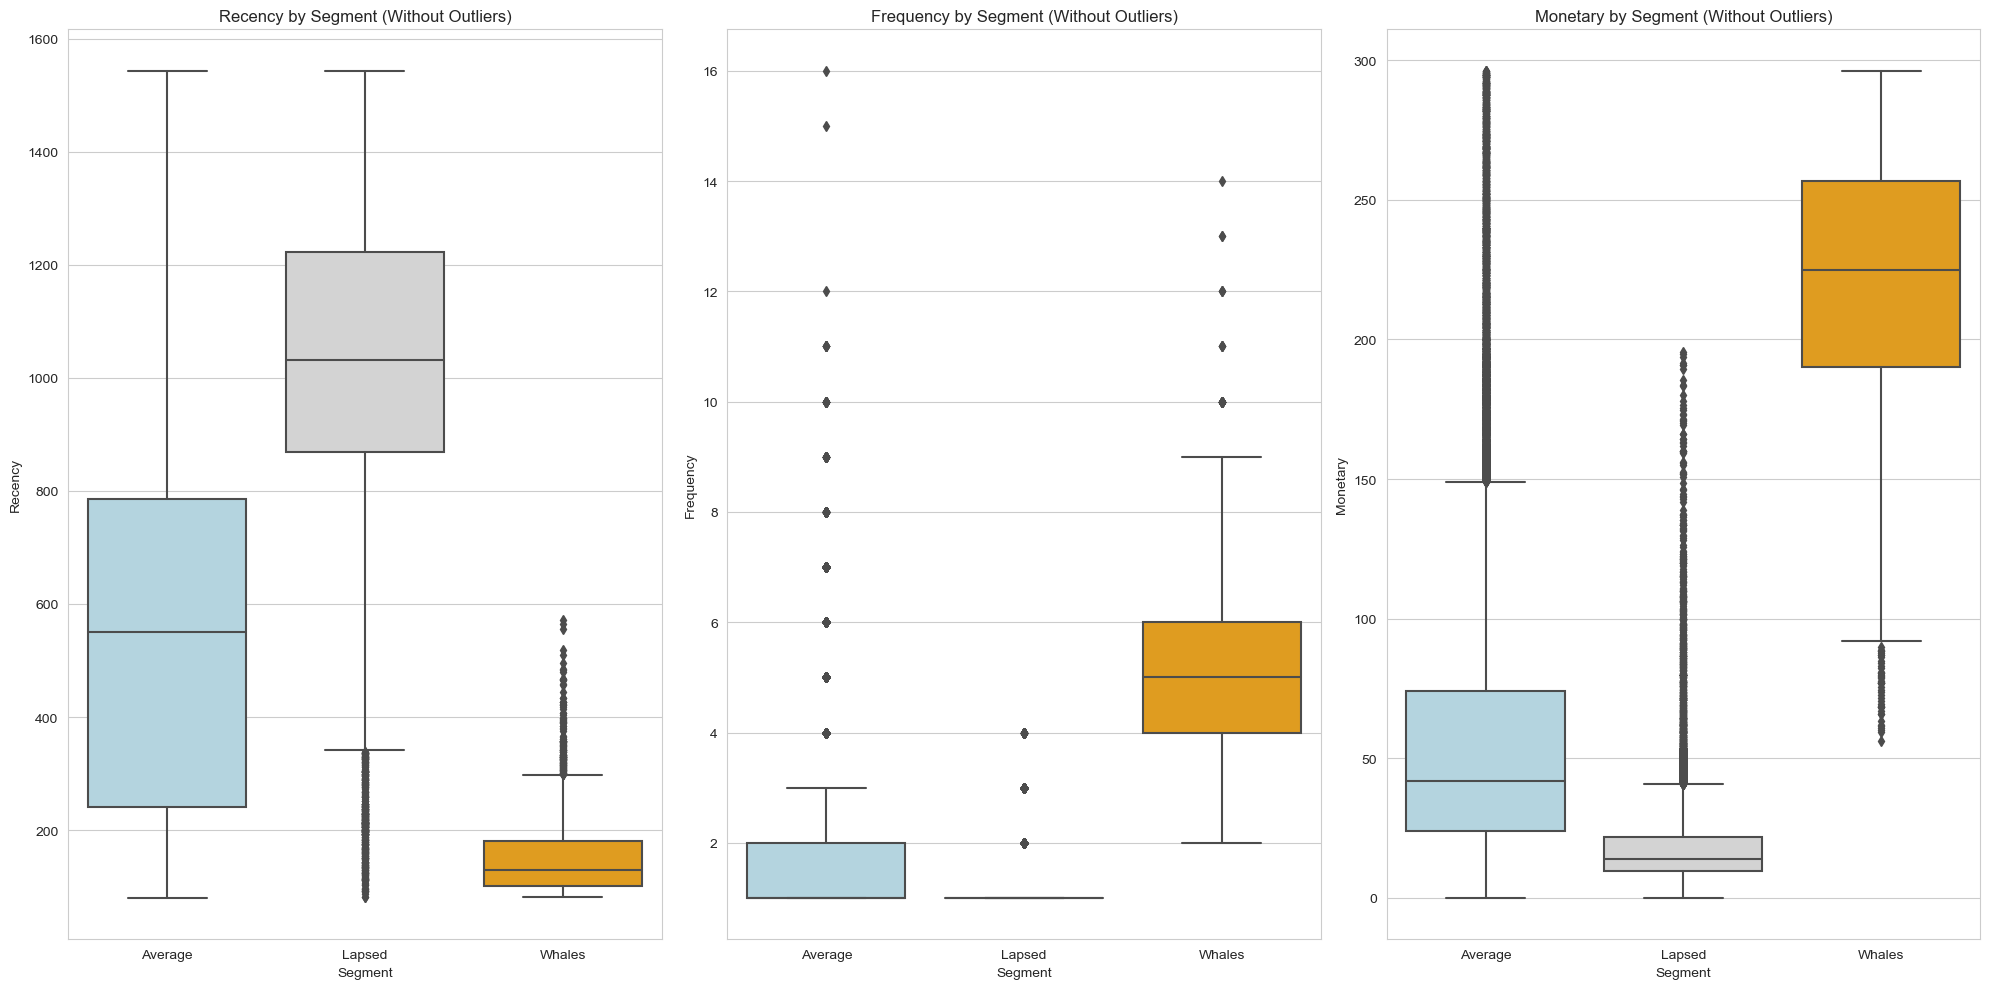

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the IQR for the monetary values
Q1 = rfm_df['Monetary'].quantile(0.25)
Q3 = rfm_df['Monetary'].quantile(0.75)
IQR = Q3 - Q1

palette = {'Whales': 'orange', 'Average': 'lightblue', 'Lapsed': 'lightgrey'}

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers from the monetary column
rfm_df_filtered = rfm_df[(rfm_df['Monetary'] >= lower_bound) & (rfm_df['Monetary'] <= upper_bound)]

# Box plots for RFM values by segment without outliers
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
sns.boxplot(x='Segment', y='Recency', data=rfm_df_filtered, palette=palette)
plt.title('Recency by Segment (Without Outliers)')
plt.yscale('linear')  # Optional: Use log scale if needed

plt.subplot(1, 3, 2)
sns.boxplot(x='Segment', y='Frequency', data=rfm_df_filtered, palette=palette)
plt.title('Frequency by Segment (Without Outliers)')
plt.yscale('linear')  # Optional: Use log scale if needed

plt.subplot(1, 3, 3)
sns.boxplot(x='Segment', y='Monetary', data=rfm_df_filtered, palette=palette)
plt.title('Monetary by Segment (Without Outliers)')
plt.yscale('linear')  # Optional: Use log scale if needed

plt.tight_layout()
plt.show()


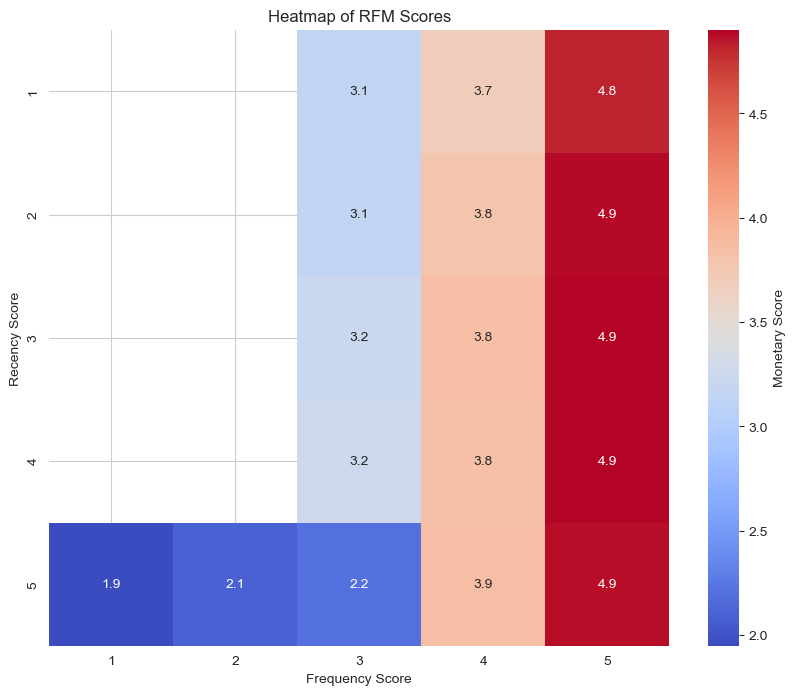

In [28]:
# Check for missing values and drop them if necessary
rfm_df = rfm_df.dropna(subset=['R_Score', 'F_Score', 'M_Score'])

# Convert scores to integers if they are not already
rfm_df['R_Score'] = rfm_df['R_Score'].astype(int)
rfm_df['F_Score'] = rfm_df['F_Score'].astype(int)
rfm_df['M_Score'] = rfm_df['M_Score'].astype(float)

# Prepare a pivot table for heatmap visualization
rfm_pivot = rfm_df.pivot_table(index='R_Score', columns='F_Score', values='M_Score', aggfunc='mean')

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(rfm_pivot, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Monetary Score'})
plt.title('Heatmap of RFM Scores')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.show()


In [29]:
master_df = rfm_df

In [30]:
master_df.head(400)

,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster
0,2823889911870,166,21,1013,66,4,5,5,14,Whales,1
1,2823904034878,124,1,95,124,5,1,4,10,Average,2
2,2824033763390,1150,2,33,264,2,3,3,8,Lapsed,0
3,2824200290366,82,58,25315,25,3,5,5,13,Average,1
4,2824311537726,95,19,1950,57,4,5,5,14,Whales,1
...,...,...,...,...,...,...,...,...,...,...,...
396,2966938058814,1484,1,108,1484,5,1,4,10,Average,0
397,2966951985214,786,3,167,148,1,4,4,9,Average,0
398,2966982557758,108,43,9116,34,3,5,5,13,Average,1
399,2966984163390,91,15,2499,101,5,5,5,15,Whales,1


In [31]:
merged_data.head()

,customer_id,customer_email,first_name,last_name,customer_created_at,orders_count,billing_address_address_1,billing_address_city,billing_address_country,billing_address_country_code,...,order_processed_at,order_line_price,order_volume,total_spent,average_order_value,order_frequency,product_title,created_at_x,cancelled_at_x,subscription_status
0,5546927325246,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,2022-10-23 10:55:41,3,4,12,3,4,Bower Rinse Aid - 500ml,NaT,NaT,Direct Purchase
1,5546927325246,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,2022-10-23 10:55:41,4,27,114,4,9,Bower Fabric Conditioner - Lavender 1L,NaT,NaT,Direct Purchase
2,5546927325246,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,2022-10-23 10:55:41,4,2,9,4,2,Bower Collective Pot Brush 7cm Fibre,NaT,NaT,Direct Purchase
3,5546927325246,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,2022-10-23 10:55:41,5,21,107,5,10,Bower Toilet Cleaner - Pine & Cedarwood 1L,NaT,NaT,Direct Purchase
4,5546927325246,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,11 Ilex Close,High Wycombe,United Kingdom,GB,...,2022-12-13 07:15:00,3,4,12,3,4,Bower Rinse Aid - 500ml,NaT,NaT,Direct Purchase


In [32]:
# Save the master DataFrame to a CSV file
master_df.to_csv('CLV_starterfile.csv', index=False)


In [33]:
import pandas as pd

# Define thresholds based on quantiles
high_freq_threshold = master_df['Frequency'].quantile(0.75)  # Top 25% for Frequency
high_recency_threshold = master_df['Recency'].quantile(0.75)  # Top 25% for Recency
low_monetary_threshold = master_df['Monetary'].quantile(0.25)  # Bottom 25% for Monetary

# Filter the dataframe based on these thresholds
high_freq_high_rec_low_monetary = master_df[
    (master_df['Frequency'] >= high_freq_threshold) &
    (master_df['Recency'] >= high_recency_threshold) &
    (master_df['Monetary'] <= low_monetary_threshold)
]

# Display the filtered dataframe
high_freq_high_rec_low_monetary.head()

# Save the result to a new CSV file if needed
high_freq_high_rec_low_monetary.to_csv('high_freq_high_rec_low_monetary_customers.csv', index=False)


In [34]:
df['cohort'] = df.groupby('customer_id')['order_processed_at'].transform('min')


In [35]:
avg_segment = rfm_df[rfm_df['Segment'] == 'Average']
frequency_distribution = avg_segment['Frequency'].value_counts().sort_index()
print(frequency_distribution)


1     27733
2      6858
3      4384
4      2598
5      1258
6       834
7       598
8       406
9       361
10      258
11      223
12      195
13      166
14      145
15      117
16      112
17       84
18       79
19       65
20       70
21       55
22       50
23       48
24       35
25       42
26       34
27       34
28       32
29       35
30       19
31       31
32       18
33       19
34       23
35       14
36        8
37       13
38        9
39       12
40       11
41        8
42        8
43        8
44        7
45        7
46        5
47        2
48        4
49        1
50        3
51        2
52        2
53        2
54        1
56        1
57        1
58        2
59        1
62        1
84        1
Name: Frequency, dtype: int64


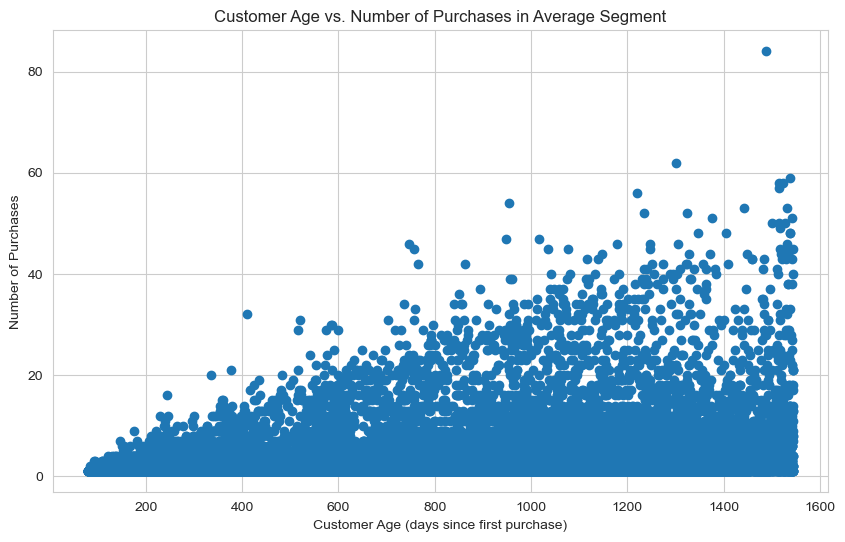

In [36]:
import pandas as pd
from datetime import datetime

# Assuming df is already loaded and preprocessed

# Step 1: Create the cohort column (first purchase date for each customer)
df['cohort'] = df.groupby('customer_id')['order_processed_at'].transform('min')

# Step 2: Filter the 'Average' segment from your RFM table
avg_segment = rfm_df[rfm_df['Segment'] == 'Average']

# Step 3: Merge the 'cohort' information into the RFM DataFrame
avg_segment = avg_segment.merge(df[['customer_id', 'cohort']].drop_duplicates(), on='customer_id')

# Step 4: Calculate customer age in days since their first purchase
avg_segment['customer_age'] = (analysis_date - avg_segment['cohort']).dt.days

# Step 5: Plotting the customer age vs number of purchases to analyze behavior
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(avg_segment['customer_age'], avg_segment['Frequency'])
plt.xlabel('Customer Age (days since first purchase)')
plt.ylabel('Number of Purchases')
plt.title('Customer Age vs. Number of Purchases in Average Segment')
plt.grid(True)
plt.show()


In [37]:
import pandas as pd

# Create bins for customer age
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600]
labels = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '1201-1400', '1401-1600']
avg_segment['Age_Bin'] = pd.cut(avg_segment['customer_age'], bins=bins, labels=labels, include_lowest=True)

# Calculate the average number of purchases for each age bin
average_purchases_per_bin = avg_segment.groupby('Age_Bin')['Frequency'].mean().reset_index()

# Display the results
print(average_purchases_per_bin)


     Age_Bin  Frequency
0      0-200          1
1    201-400          2
2    401-600          2
3    601-800          2
4   801-1000          3
5  1001-1200          4
6  1201-1400          5
7  1401-1600          8


In [38]:
import pandas as pd


# Calculate Frequency (number of unique orders per customer)
frequency_df = df.groupby('customer_id').agg({
    'order_processed_at': 'nunique'
}).reset_index()

# Filter customers with over 60 unique orders
high_frequency_customers = frequency_df[frequency_df['order_processed_at'] > 60]

# Display the results
print(high_frequency_customers)


        customer_id  order_processed_at
8     2824517648446                  63
685   3010460745790                  67
2357  3422297391166                  84
8524  5026585739326                  62
14880 5204194656318                  66


In [39]:
import pandas as pd

high_spenders = rfm_df[rfm_df['Monetary'] > 2000000]

# Display the result
high_spenders


,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster


In [40]:

# Assuming your dataframe is named rfm_df and contains the 'Frequency' and 'customer_id' columns
high_frequency_customers = rfm_df[rfm_df['Monetary'] > 130000][['customer_id', 'Monetary']]

high_frequency_customers

,customer_id,Monetary
270,2943934070846,139401


In [41]:
master_df

,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster
0,2823889911870,166,21,1013,66,4,5,5,14,Whales,1
1,2823904034878,124,1,95,124,5,1,4,10,Average,2
2,2824033763390,1150,2,33,264,2,3,3,8,Lapsed,0
3,2824200290366,82,58,25315,25,3,5,5,13,Average,1
4,2824311537726,95,19,1950,57,4,5,5,14,Whales,1
...,...,...,...,...,...,...,...,...,...,...,...
76274,7265939292222,81,1,27,81,5,3,2,10,Average,2
76275,7265962033214,81,1,63,81,5,3,4,12,Average,2
76276,7265992179774,81,1,62,81,5,3,4,12,Average,2
76277,7266079277118,80,1,15,80,5,3,2,10,Average,2


In [42]:
natasha_data = pd.read_csv('natasha bower.csv')
natasha_data

,customer_id,customer_email,first_name,last_name,customer_created_at,orders_count,email_marketing_consent_state,billing_address_address_1,billing_address_address_2,billing_address_city,...,product_type,sku,title,order_processed_at,order_line_price,order_volume,total_spent,average_order_value,order_frequency,product_title
0,3422297391166,natasha@parkcircusplace.plus.com,Natasha,Russell,2020-08-26 12:07:28.000000 UTC,86,SUBSCRIBED,3 Park circus place,NaN,Glasgow,...,Pump Dispenser,BC-PETS-05L-PDB-A,Amber,2020-08-26 13:19:39.000000 UTC,4,2,8,4,1,Reusable PET Dispenser 500ml - Amber
1,3422297391166,natasha@parkcircusplace.plus.com,Natasha,Russell,2020-08-26 12:07:28.000000 UTC,86,SUBSCRIBED,3 Park circus place,NaN,Glasgow,...,Laundry Dispenser,BC-PETB-1L-DB,Default Title,2020-08-26 13:19:39.000000 UTC,3,12,36,3,5,Reusable PET Laundry Bottle - 1000ml
2,3422297391166,natasha@parkcircusplace.plus.com,Natasha,Russell,2020-08-26 12:07:28.000000 UTC,86,SUBSCRIBED,3 Park circus place,NaN,Glasgow,...,Scourer,GREE0002,Default Title,2020-08-26 13:19:39.000000 UTC,5,2,10,5,1,Coconut Fibre Scourers - Pack of 2
3,3422297391166,natasha@parkcircusplace.plus.com,Natasha,Russell,2020-08-26 12:07:28.000000 UTC,86,SUBSCRIBED,3 Park circus place,NaN,Glasgow,...,Bathroom Cleaner Spray,BC-BC-00-1L,Default Title,2020-08-26 13:19:39.000000 UTC,4,9,36,4,6,Bower Bathroom Cleaner Spray Refill 1L
4,3422297391166,natasha@parkcircusplace.plus.com,Natasha,Russell,2020-08-26 12:07:28.000000 UTC,86,SUBSCRIBED,3 Park circus place,NaN,Glasgow,...,Baking Paper,IFYC0003,Default Title,2020-08-26 13:19:39.000000 UTC,5,6,29,5,6,If You Care - Unbleached Parchment Baking Pape...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,3422297391166,natasha@parkcircusplace.plus.com,Natasha,Russell,2020-08-26 12:07:28.000000 UTC,86,SUBSCRIBED,3 Park circus place,NaN,Glasgow,...,Conditioner,BRAM-COR-05L,Default Title,2024-05-16 04:23:37.000000 UTC,18,10,184,18,10,"Bramley Lemon, Mandarin and Rosemary - Conditi..."
371,3422297391166,natasha@parkcircusplace.plus.com,Natasha,Russell,2020-08-26 12:07:28.000000 UTC,86,SUBSCRIBED,3 Park circus place,NaN,Glasgow,...,Laundry,BC-LL-FL-1L,Default Title,2024-05-16 04:23:52.000000 UTC,6,15,87,6,5,Bower Non-Bio Laundry Liquid - Fresh Linen 1L
372,3422297391166,natasha@parkcircusplace.plus.com,Natasha,Russell,2020-08-26 12:07:28.000000 UTC,86,SUBSCRIBED,3 Park Circus place,NaN,Glasgow,...,Fabric conditioner,BC-FC-FL-1L,Default Title,2024-06-01 10:20:52.000000 UTC,4,18,80,4,5,Bower Fabric Conditioner - Fresh Linen 1L
373,3422297391166,natasha@parkcircusplace.plus.com,Natasha,Russell,2020-08-26 12:07:28.000000 UTC,86,SUBSCRIBED,3 Park circus place,NaN,Glasgow,...,Fabric conditioner,BC-FC-LA-1L,Default Title,2024-06-16 04:23:50.000000 UTC,4,121,465,4,35,Bower Fabric Conditioner - Lavender 1L


In [43]:
# Calculate the total sum of the 'total_spent' column
total_spent_sum_natasha = natasha_data['total_spent'].sum()

total_spent_sum_natasha


59260.93

In [44]:
anna_data = pd.read_csv('anna bower.csv')


# Calculate the total sum of the 'total_spent' column
total_spent_sum_anna = anna_data['total_spent'].sum()

total_spent_sum_anna


29451.679999999997

In [45]:
monetary_df[monetary_df['customer_id'] == 2824369864766]

,customer_id,Monetary
5,2824369864766,29208


In [46]:
# Calculate the average RFM score
average_rfm_score = rfm_df['RFM_Score'].min()
average_rfm_score

5

In [47]:
# Save the DataFrame to a CSV file
master_df.to_csv('clv_starter.csv', index=False)


In [48]:
master_df

,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster
0,2823889911870,166,21,1013,66,4,5,5,14,Whales,1
1,2823904034878,124,1,95,124,5,1,4,10,Average,2
2,2824033763390,1150,2,33,264,2,3,3,8,Lapsed,0
3,2824200290366,82,58,25315,25,3,5,5,13,Average,1
4,2824311537726,95,19,1950,57,4,5,5,14,Whales,1
...,...,...,...,...,...,...,...,...,...,...,...
76274,7265939292222,81,1,27,81,5,3,2,10,Average,2
76275,7265962033214,81,1,63,81,5,3,4,12,Average,2
76276,7265992179774,81,1,62,81,5,3,4,12,Average,2
76277,7266079277118,80,1,15,80,5,3,2,10,Average,2


In [49]:
# Calculate the average R, F, M values for each segment
avg_rfm_per_segment = master_df.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Rename columns for clarity
avg_rfm_per_segment.columns = ['Segment', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary']

# Display the average R, F, M values for each segment
avg_rfm_per_segment


,Segment,Avg_Recency,Avg_Frequency,Avg_Monetary
0,Average,545,3,256
1,Lapsed,1020,1,19
2,Whales,138,10,1475


In [50]:
master_df.head()

,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster
0,2823889911870,166,21,1013,66,4,5,5,14,Whales,1
1,2823904034878,124,1,95,124,5,1,4,10,Average,2
2,2824033763390,1150,2,33,264,2,3,3,8,Lapsed,0
3,2824200290366,82,58,25315,25,3,5,5,13,Average,1
4,2824311537726,95,19,1950,57,4,5,5,14,Whales,1


In [51]:
rfm_df.head()

,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster
0,2823889911870,166,21,1013,66,4,5,5,14,Whales,1
1,2823904034878,124,1,95,124,5,1,4,10,Average,2
2,2824033763390,1150,2,33,264,2,3,3,8,Lapsed,0
3,2824200290366,82,58,25315,25,3,5,5,13,Average,1
4,2824311537726,95,19,1950,57,4,5,5,14,Whales,1


In [52]:
sub_df = pd.read_csv('BowerCA_with_SubscriptionStatus.csv')
sub_df.head()

/var/folders/fy/xzkbv6m94mnbyhk_sp_6mpmw0000gn/T/ipykernel_14938/3842370878.py:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  sub_df = pd.read_csv('BowerCA_with_SubscriptionStatus.csv')


,customer_id,customer_email,first_name,last_name,customer_created_at,orders_count,billing_address_address_1,billing_address_city,billing_address_country,billing_address_country_code,...,order_processed_at,order_line_price,order_volume,total_spent,average_order_value,order_frequency,product_title,created_at,cancelled_at,subscription_status
0,5546927325246,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,2022-10-23 10:55:41,3,4,12,3,4,Bower Rinse Aid - 500ml,NaN,NaN,Never Subscribed
1,5546927325246,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,2022-10-23 10:55:41,4,27,114,4,9,Bower Fabric Conditioner - Lavender 1L,NaN,NaN,Never Subscribed
2,5546927325246,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,2022-10-23 10:55:41,4,2,9,4,2,Bower Collective Pot Brush 7cm Fibre,NaN,NaN,Never Subscribed
3,5546927325246,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,The Three Pines Church Road,High Wycombe,United Kingdom,GB,...,2022-10-23 10:55:41,5,21,107,5,10,Bower Toilet Cleaner - Pine & Cedarwood 1L,NaN,NaN,Never Subscribed
4,5546927325246,baxter.cath@gmail.com,Catherine,Baxter,2021-12-28 17:57:21,14,11 Ilex Close,High Wycombe,United Kingdom,GB,...,2022-12-13 07:15:00,3,4,12,3,4,Bower Rinse Aid - 500ml,NaN,NaN,Never Subscribed


In [53]:
master_df = pd.merge(master_df, sub_df, on='customer_id', how='outer')

In [54]:
master_df.head()

,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,...,order_processed_at,order_line_price,order_volume,total_spent,average_order_value,order_frequency,product_title,created_at,cancelled_at,subscription_status
0,2823889911870,166,21,1013,66,4,5,5,14,Whales,...,2020-08-31 06:43:22,10,1,10,10,1,Reusable Glass Trigger Spray Silicone Sleeve -...,2022-02-17 08:48:52,2022-04-15 06:39:14,Cancelled
1,2823889911870,166,21,1013,66,4,5,5,14,Whales,...,2020-08-31 06:43:22,10,1,10,10,1,Reusable Glass Trigger Spray Silicone Sleeve -...,2022-04-15 06:33:04,2022-07-16 17:04:50,Cancelled
2,2823889911870,166,21,1013,66,4,5,5,14,Whales,...,2020-08-31 06:43:22,10,1,10,10,1,Reusable Glass Trigger Spray Silicone Sleeve -...,2021-01-16 08:07:29,2021-03-16 14:18:35,Cancelled
3,2823889911870,166,21,1013,66,4,5,5,14,Whales,...,2020-08-31 06:43:22,10,1,10,10,1,Reusable Glass Trigger Spray Silicone Sleeve -...,2021-11-24 20:37:39,2022-02-17 08:42:13,Cancelled
4,2823889911870,166,21,1013,66,4,5,5,14,Whales,...,2020-08-31 06:43:22,10,1,10,10,1,Reusable Glass Trigger Spray Silicone Sleeve -...,2023-03-22 06:03:28,2024-02-08 15:07:05,Cancelled


In [55]:
master_df.to_csv('clv_starter.csv', index=False)

In [56]:
master_df.head()

,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,...,order_processed_at,order_line_price,order_volume,total_spent,average_order_value,order_frequency,product_title,created_at,cancelled_at,subscription_status
0,2823889911870,166,21,1013,66,4,5,5,14,Whales,...,2020-08-31 06:43:22,10,1,10,10,1,Reusable Glass Trigger Spray Silicone Sleeve -...,2022-02-17 08:48:52,2022-04-15 06:39:14,Cancelled
1,2823889911870,166,21,1013,66,4,5,5,14,Whales,...,2020-08-31 06:43:22,10,1,10,10,1,Reusable Glass Trigger Spray Silicone Sleeve -...,2022-04-15 06:33:04,2022-07-16 17:04:50,Cancelled
2,2823889911870,166,21,1013,66,4,5,5,14,Whales,...,2020-08-31 06:43:22,10,1,10,10,1,Reusable Glass Trigger Spray Silicone Sleeve -...,2021-01-16 08:07:29,2021-03-16 14:18:35,Cancelled
3,2823889911870,166,21,1013,66,4,5,5,14,Whales,...,2020-08-31 06:43:22,10,1,10,10,1,Reusable Glass Trigger Spray Silicone Sleeve -...,2021-11-24 20:37:39,2022-02-17 08:42:13,Cancelled
4,2823889911870,166,21,1013,66,4,5,5,14,Whales,...,2020-08-31 06:43:22,10,1,10,10,1,Reusable Glass Trigger Spray Silicone Sleeve -...,2023-03-22 06:03:28,2024-02-08 15:07:05,Cancelled


In [57]:
# Check for the number of unique product titles
unique_product_titles = master_df['product_title'].nunique()

# Display the number of unique product titles
print(f"Number of unique product titles: {unique_product_titles}")


Number of unique product titles: 555


In [58]:
# Count of unique customer IDs in the 'customer_id' column of rfm_df
unique_customer_count = master_df['customer_id'].nunique()

# Display the count of unique customer IDs
print(f"Count of unique customer IDs: {unique_customer_count}")


Count of unique customer IDs: 76496


In [59]:
master_df.head()

,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,...,order_processed_at,order_line_price,order_volume,total_spent,average_order_value,order_frequency,product_title,created_at,cancelled_at,subscription_status
0,2823889911870,166,21,1013,66,4,5,5,14,Whales,...,2020-08-31 06:43:22,10,1,10,10,1,Reusable Glass Trigger Spray Silicone Sleeve -...,2022-02-17 08:48:52,2022-04-15 06:39:14,Cancelled
1,2823889911870,166,21,1013,66,4,5,5,14,Whales,...,2020-08-31 06:43:22,10,1,10,10,1,Reusable Glass Trigger Spray Silicone Sleeve -...,2022-04-15 06:33:04,2022-07-16 17:04:50,Cancelled
2,2823889911870,166,21,1013,66,4,5,5,14,Whales,...,2020-08-31 06:43:22,10,1,10,10,1,Reusable Glass Trigger Spray Silicone Sleeve -...,2021-01-16 08:07:29,2021-03-16 14:18:35,Cancelled
3,2823889911870,166,21,1013,66,4,5,5,14,Whales,...,2020-08-31 06:43:22,10,1,10,10,1,Reusable Glass Trigger Spray Silicone Sleeve -...,2021-11-24 20:37:39,2022-02-17 08:42:13,Cancelled
4,2823889911870,166,21,1013,66,4,5,5,14,Whales,...,2020-08-31 06:43:22,10,1,10,10,1,Reusable Glass Trigger Spray Silicone Sleeve -...,2023-03-22 06:03:28,2024-02-08 15:07:05,Cancelled


In [60]:
import pandas as pd

# Assuming rfm_df has a 'Cluster' column indicating cluster assignments
# Group by 'Cluster' and calculate summary statistics for Recency, Frequency, and Monetary
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': ['mean', 'median', 'std', 'min', 'max'],
    'Frequency': ['mean', 'median', 'std', 'min', 'max'],
    'Monetary': ['mean', 'median', 'std', 'min', 'max'],
    'customer_id': 'count'  # Assuming 'CustomerID' is the identifier for counting cluster sizes
})

# Rename columns for clarity
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
cluster_summary.rename(columns={'CustomerID_count': 'Cluster_Size'}, inplace=True)

# Display the cluster summary
cluster_summary


,Recency_mean,Recency_median,Recency_std,Recency_min,Recency_max,Frequency_mean,Frequency_median,Frequency_std,Frequency_min,Frequency_max,Monetary_mean,Monetary_median,Monetary_std,Monetary_min,Monetary_max,customer_id_count
Cluster,,,,,,,,,,,,,,,,
0,945,911,239,563,1543,1,1,1,1,18,51,25,111,1,3350,39401
1,156,107,139,81,1109,23,21,8,3,84,5823,4015,6254,623,139401,2605
2,264,213,161,80,953,4,2,4,1,19,286,78,477,0,5314,34270


In [61]:
master_df.columns

Index(['customer_id', 'Recency', 'Frequency', 'Monetary', 'Avg_Interval',
       'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'Segment', 'Cluster',
       'customer_email', 'first_name', 'last_name', 'customer_created_at',
       'orders_count', 'billing_address_address_1', 'billing_address_city',
       'billing_address_country', 'billing_address_country_code',
       'billing_address_first_name', 'billing_address_last_name',
       'billing_address_zip', 'buyer_accepts_marketing', 'product_type', 'sku',
       'title', 'order_processed_at', 'order_line_price', 'order_volume',
       'total_spent', 'average_order_value', 'order_frequency',
       'product_title', 'created_at', 'cancelled_at', 'subscription_status'],
      dtype='object')

In [64]:
import pandas as pd

# Assuming you already have a master_df dataframe with relevant data

# List of the most important columns for analysis
important_columns = [
    'orders_count', 'total_spent', 'average_order_value', 'order_frequency'
]

# Get summary statistics for the important columns
summary_stats = master_df[important_columns].describe()

# Display the summary statistics
print(summary_stats)



       total_spent  average_order_value  order_frequency
count      8202474              8202474          8202474
mean            49                    7                6
std             75                    5                6
min              0                    0                1
25%             10                    4                2
50%             24                    5                4
75%             58                    8                8
max           2720                 2720               50


In [65]:
import pandas as pd

# Grouping by SKU and calculating total sales or frequency
sku_grouped = master_df.groupby('sku').agg({
    'order_volume': 'sum',  # Total volume of orders for each SKU
    'total_spent': 'sum',   # Total amount spent on each SKU
    'orders_count': 'sum'   # Total number of orders for each SKU
})

# Sorting SKUs based on total_spent (you can change this to order_volume or orders_count)
top_skus = sku_grouped.sort_values(by='total_spent', ascending=False).head(5)

# Get summary statistics for the top 5 SKUs
top_skus_stats = top_skus.describe()

# Display the top 5 SKUs and their summary statistics
print(top_skus_stats)


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [69]:
import pandas as pd

# Convert relevant columns to numeric, coercing errors to NaN
master_df['order_volume'] = pd.to_numeric(master_df['order_volume'], errors='coerce')
master_df['total_spent'] = pd.to_numeric(master_df['total_spent'], errors='coerce')
master_df['orders_count'] = pd.to_numeric(master_df['orders_count'], errors='coerce')

# Grouping by product_title and calculating total sales or frequency
product_grouped = master_df.groupby('product_title').agg({
    'order_volume': 'sum',  # Total volume of orders for each product title
    'total_spent': 'sum',   # Total amount spent on each product title
    'orders_count': 'sum'   # Total number of orders for each product title
})

# Sorting product titles based on total_spent (you can change this to order_volume or orders_count)
top_products = product_grouped.sort_values(by='total_spent', ascending=False).head(5)

# Resetting the index to include product_title as a column in the DataFrame
top_products = top_products.reset_index()

# Get summary statistics for the top 5 product titles
top_products_stats = top_products.describe()

# Display the top 5 product titles along with their statistics
print(top_products)


                                       product_title  order_volume  \
0         Bower Non-Bio Laundry Liquid - Lavender 1L       5751430   
1      Bower 100% Bamboo White Toilet Roll - 24 Pack       1012747   
2            Bower Washing Up Liquid - Grapefruit 1L       5356615   
3             Bower Fabric Conditioner - Lavender 1L       5159527   
4  Cheeky Panda Plastic Free Bamboo Toilet Roll 2...        807004   

   total_spent  orders_count  
0     30827201       6959027  
1     21541984       2704110  
2     20701759       9569996  
3     19562038       6513748  
4     17703473       2260803  


/var/folders/fy/xzkbv6m94mnbyhk_sp_6mpmw0000gn/T/ipykernel_14938/180112884.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


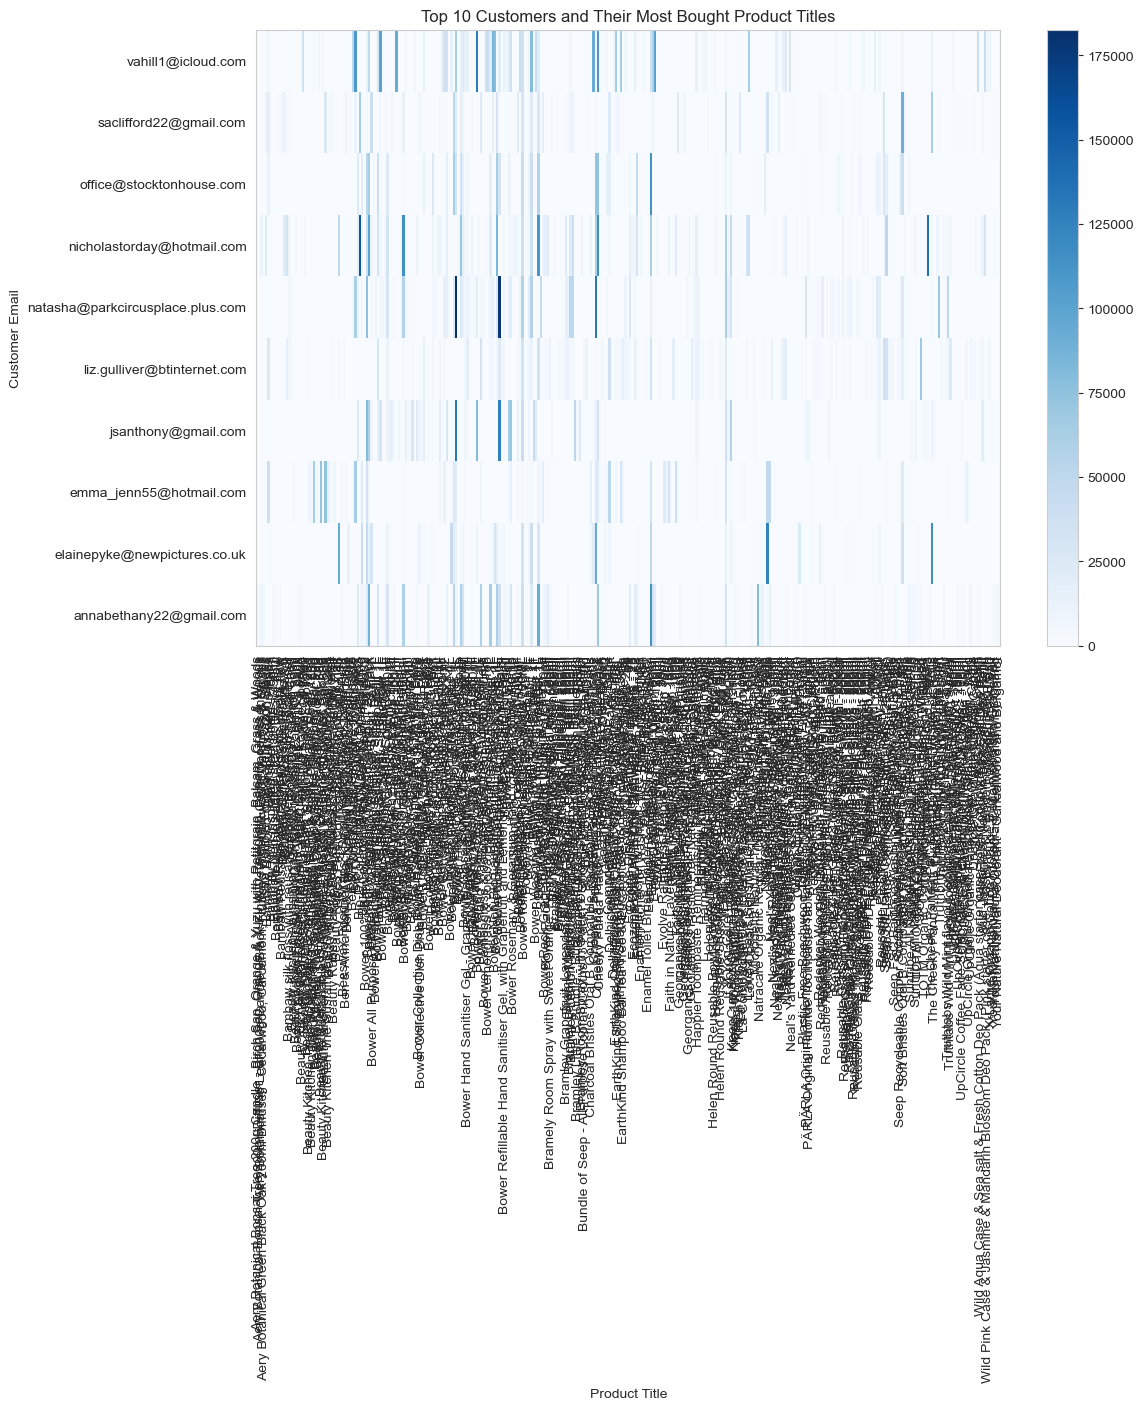

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert relevant columns to numeric, coercing errors to NaN
master_df['orders_count'] = pd.to_numeric(master_df['orders_count'], errors='coerce')

# Group by customer and product title to get the total number of products bought by each customer
customer_product_grouped = master_df.groupby(['customer_email', 'product_title']).agg({
    'orders_count': 'sum'  # Total number of orders for each product title by each customer
}).reset_index()

# Get the top 10 customers based on the total number of orders
top_customers = customer_product_grouped.groupby('customer_email').agg({
    'orders_count': 'sum'
}).sort_values(by='orders_count', ascending=False).head(10).reset_index()

# Merge the top customers with the customer-product grouping to get the top products for these customers
top_customers_products = customer_product_grouped[customer_product_grouped['customer_email'].isin(top_customers['customer_email'])]

# Create a pivot table for the top customers and their most bought product titles
pivot_table = top_customers_products.pivot(index='customer_email', columns='product_title', values='orders_count').fillna(0)

# Plot the heatmap of the top 10 customers and their most bought products
plt.figure(figsize=(12, 8))
plt.title('Top 10 Customers and Their Most Bought Product Titles')
heatmap = plt.pcolor(pivot_table, cmap='Blues')
plt.colorbar(heatmap)

# Set the labels for the axes
plt.xticks(ticks=[i + 0.5 for i in range(len(pivot_table.columns))], labels=pivot_table.columns, rotation=90)
plt.yticks(ticks=[i + 0.5 for i in range(len(pivot_table.index))], labels=pivot_table.index)

plt.xlabel('Product Title')
plt.ylabel('Customer Email')

plt.tight_layout()
plt.show()



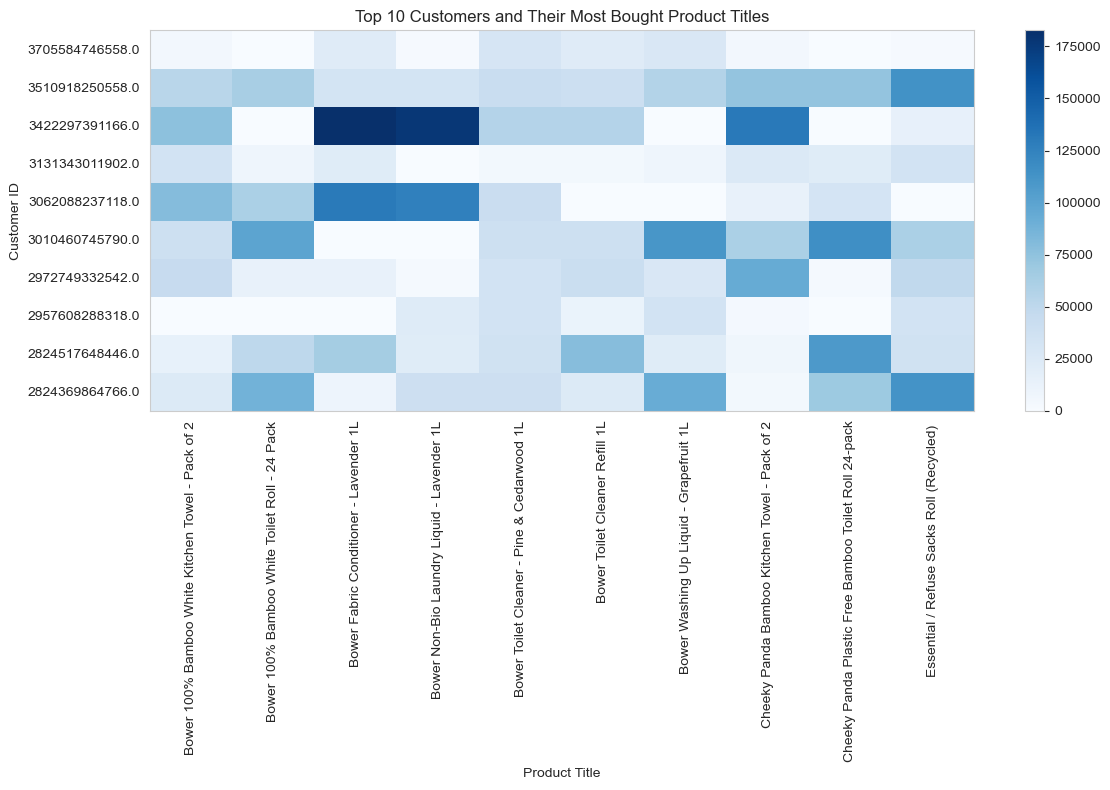

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert relevant columns to numeric, coercing errors to NaN
master_df['orders_count'] = pd.to_numeric(master_df['orders_count'], errors='coerce')

# Group by customer_id and product_title to get the total number of products bought by each customer
customer_product_grouped = master_df.groupby(['customer_id', 'product_title']).agg({
    'orders_count': 'sum'  # Total number of orders for each product title by each customer
}).reset_index()

# Get the top 10 customers based on the total number of orders
top_customers = customer_product_grouped.groupby('customer_id').agg({
    'orders_count': 'sum'
}).sort_values(by='orders_count', ascending=False).head(10).reset_index()

# Merge the top customers with the customer-product grouping to get the top products for these customers
top_customers_products = customer_product_grouped[customer_product_grouped['customer_id'].isin(top_customers['customer_id'])]

# Find the top 10 most frequently purchased products across these customers
top_products = top_customers_products.groupby('product_title').agg({
    'orders_count': 'sum'
}).sort_values(by='orders_count', ascending=False).head(10).reset_index()

# Filter the customer-product dataset for only the top 10 products
filtered_data = top_customers_products[top_customers_products['product_title'].isin(top_products['product_title'])]

# Create a pivot table for the top customers and their most bought products
pivot_table = filtered_data.pivot(index='customer_id', columns='product_title', values='orders_count').fillna(0)

# Plot the heatmap of the top 10 customers and their most bought products
plt.figure(figsize=(12, 8))
plt.title('Top 10 Customers and Their Most Bought Product Titles')
heatmap = plt.pcolor(pivot_table, cmap='Blues')
plt.colorbar(heatmap)

# Set the labels for the axes
plt.xticks(ticks=[i + 0.5 for i in range(len(pivot_table.columns))], labels=pivot_table.columns, rotation=90)
plt.yticks(ticks=[i + 0.5 for i in range(len(pivot_table.index))], labels=pivot_table.index)

plt.xlabel('Product Title')
plt.ylabel('Customer ID')

plt.tight_layout()
plt.show()
